In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve
from scipy.optimize import least_squares
matplotlib.rcParams.update({'font.size':22})

In [19]:
def f(t,A,T,Vth):
    return A*np.sin(2*np.pi*t/T)-Vth

In [20]:
Vth=0.8 #threshold voltage (Volt)
A=1 #Sinewave amplitude (Volt)
wrf=200 #Sinewave frequency (MHz)
T=1/(1e6*wrf) #Sine wave period

if Vth>=0:
    root0 = fsolve(f, 0.24*T, args=(A,T,Vth))
    root1 = fsolve(f, 0.26*T, args=(A,T,Vth))
else:
    root0 = fsolve(f, 0.74*T, args=(A,T,Vth))
    root1 = fsolve(f, 0.76*T, args=(A,T,Vth))

In [21]:
(root1-root0)*1e9

array([1.02416382])

In [22]:
t=np.linspace(0,T,200)

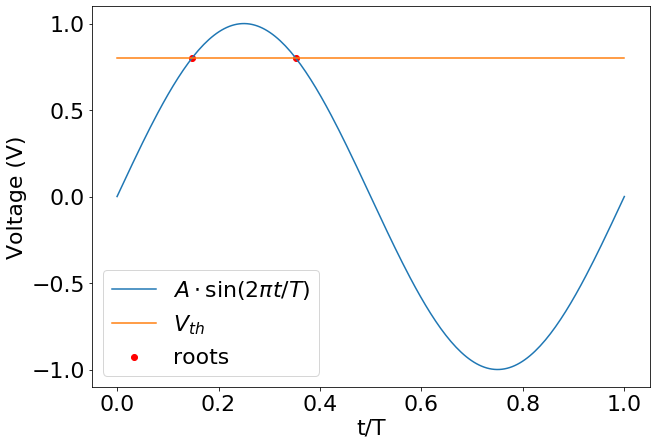

In [23]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(t/T,f(t,A,T,Vth)+Vth,label='$A\cdot\sin(2\pi t/T)$')
ax.plot(t/T,Vth*np.ones(200),label='$V_{th}$')
ax.scatter([root0/T,root1/T],[Vth,Vth],c='r',label='roots')
plt.xlabel('t/T')
plt.ylabel('Voltage (V)')
plt.legend()

# Analytical solution:

The analytical solutions to the equation $V_{th}=A\cdot\sin(2\pi t/T)$ are given by $t=\frac{T}{2\pi}\arcsin(V_{th}/A)+2\pi n$ and $t=\frac{T}{2}-\frac{T}{2\pi}\arcsin(V_{th}/A)+2\pi n$, with $n$ an integer number. The two types of solutions occur in a single period, so that the distance between two solutions of our equation in a single sine period is
$\Delta t=\frac{T}{2}-\frac{T}{2\pi}\arcsin(V_{th}/A)-\frac{T}{2\pi}\arcsin(V_{th}/A)=\frac{T}{2}-\frac{T}{\pi}\arcsin(V_{th}/A)$. This gives our pulse length, given $V_{th}$ and $A$.

## Pulse length vs. threshold voltage

Numerical solution:

In [24]:
Vths=np.linspace(0.001,0.999,301)
wrf=50
T=1/(1e6*wrf)
tlen=np.array([])
for Vth in Vths:
    if Vth>=0:
        root0 = least_squares(f, 0.22*T, args=(A,T,Vth), bounds = (0,T/4))
        root1 = least_squares(f, 0.28*T, args=(A,T,Vth), bounds = (T/4,T/2))
    else:
        root0 = least_squares(f, 0.72*T, args=(A,T,Vth), bounds = (T/2,3*T/4))
        root1 = least_squares(f, 0.78*T, args=(A,T,Vth), bounds = (3*T/4,T))
    tlen=np.append(tlen,root1.x-root0.x)

Analytical solution:

In [25]:
tlen_an=T*(0.5-np.arcsin(Vths/A)/np.pi)

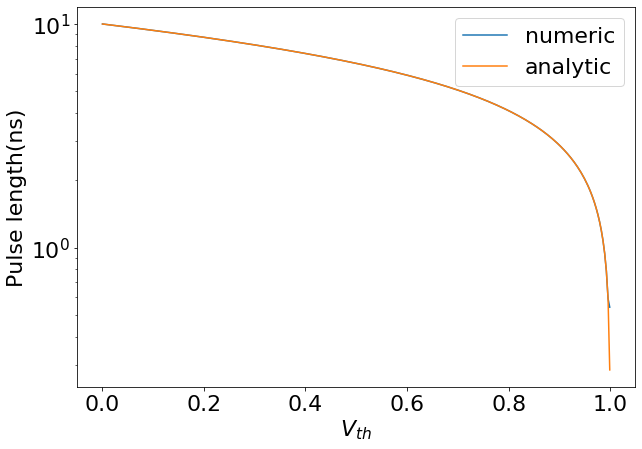

In [26]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(Vths,tlen*1e9,label='numeric')
ax.plot(Vths,tlen_an*1e9,label='analytic')
plt.xlabel('$V_{th}$')
plt.ylabel('Pulse length(ns)')
plt.yscale('log')
plt.legend()

Consider different frequencies:

In [27]:
Vths=np.linspace(0.001,0.999,301)
wrfs=[50,100,150,200]
tlen_an=np.array([])
for wrf in wrfs:
    T=1/(1e6*wrf)
    tlen_an=np.append(tlen_an,T*(0.5-np.arcsin(Vths/A)/np.pi))
tlen_an=np.reshape(tlen_an,[len(wrfs),len(Vths)])

Text(0, 0.5, 'Pulse length(ns)')

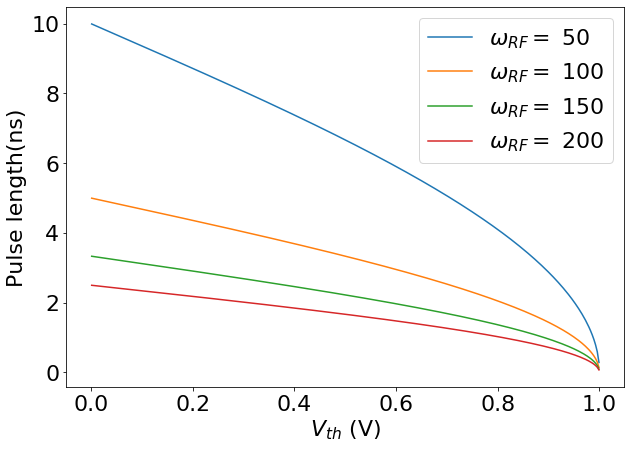

In [28]:
fig,ax=plt.subplots(figsize=(10,7))
for i in range(0,len(wrfs)):
    ax.plot(Vths,tlen_an[i,:]*1e9,label='$\omega_{RF}=$ %i' %wrfs[i])
plt.legend()
plt.xlabel('$V_{th}$ (V)')
plt.ylabel('Pulse length(ns)')

## Sensitivity to threshold change:

$\frac{d\Delta t}{dV_{th}}=-\frac{T}{\pi A\sqrt{1-\big(\frac{V_{th}}{A}\big)^2}}$

In [29]:
Vths=np.linspace(0.001,0.999,301)
wrfs=[50,100,150,200]
dt_an=np.array([])
for wrf in wrfs:
    T=1/(1e6*wrf)
    dt_an=np.append(dt_an,-T/(np.pi*A*np.sqrt(1-(Vths/A))))
dt_an=np.reshape(dt_an,[len(wrfs),len(Vths)])

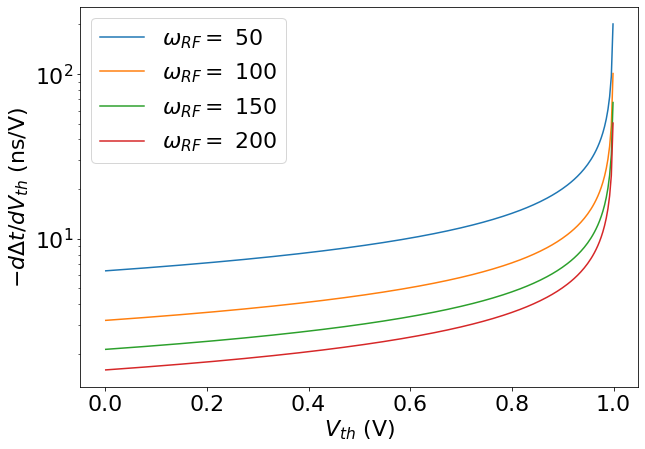

In [30]:
fig,ax=plt.subplots(figsize=(10,7))
for i in range(0,len(wrfs)):
    ax.plot(Vths,-dt_an[i,:]*1e9,label='$\omega_{RF}=$ %i' %wrfs[i])
plt.legend()
plt.xlabel('$V_{th}$ (V)')
plt.ylabel('$-d\Delta t/dV_{th}$ (ns/V)')
plt.yscale('log')

## Pulse length vs. frequency

In [31]:
Vths=[0.5,0.6,0.7,0.8,0.9]
wrfs=np.linspace(50,200,301)
Ts=1/(1e6*wrfs)
tlen_an=np.array([])
for Vth in Vths:
    tlen_an=np.append(tlen_an,Ts*(0.5-np.arcsin(Vth/A)/np.pi))
tlen_an=np.reshape(tlen_an,[len(Vths),len(wrfs)])

Text(0, 0.5, 'Pulse length(ns)')

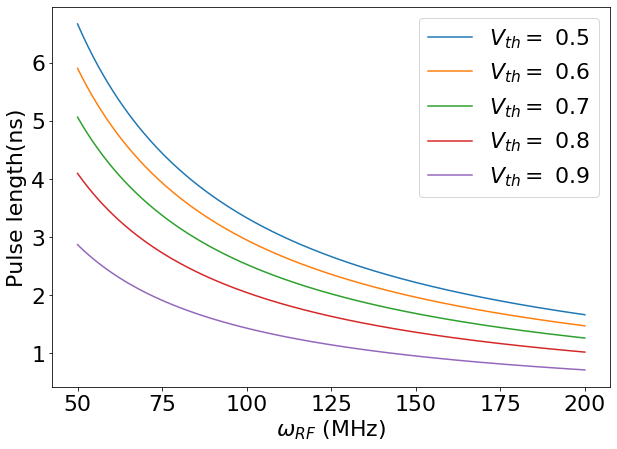

In [32]:
fig,ax=plt.subplots(figsize=(10,7))
for i in range(0,len(Vths)):
    ax.plot(wrfs,tlen_an[i,:]*1e9,label='$V_{th}=$ %1.1f' %Vths[i])
plt.legend()
plt.xlabel('$\omega_{RF}$ (MHz)')
plt.ylabel('Pulse length(ns)')

## Sensitivity to frequency change:

$\frac{d\Delta t}{df}=\frac{d\Delta t}{dT}\frac{dT}{df}=-T^2\frac{d\Delta t}{dT}=-\frac{T^2}{2}+\frac{T^2}{\pi}\arcsin(V_{th}/A)$

In [33]:
Vths=[0.5,0.6,0.7,0.8,0.9]
wrfs=np.linspace(50,200,301)
Ts=1/(1e6*wrfs)
dt_an=np.array([])
for Vth in Vths:
    dt_an=np.append(dt_an,-Ts**2*(0.5-np.arcsin(Vth/A)/np.pi))
dt_an=np.reshape(dt_an,[len(Vths),len(wrfs)])

Text(0, 0.5, '$d\\Delta t/df_{th}$ (ns/MHz)')

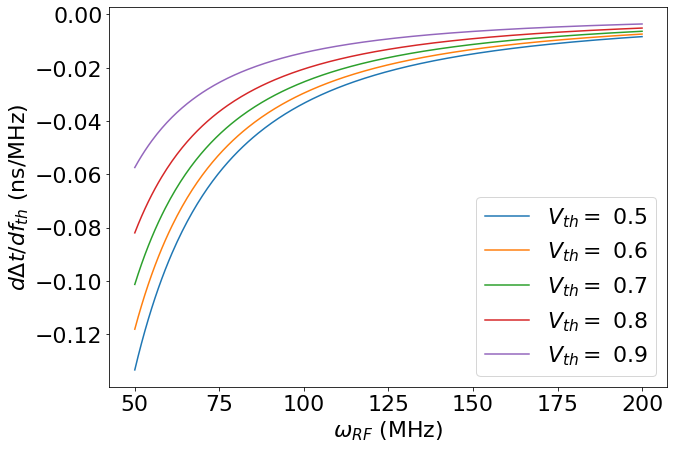

In [34]:
fig,ax=plt.subplots(figsize=(10,7))
for i in range(0,len(Vths)):
    ax.plot(wrfs,dt_an[i,:]*1e15,label='$V_{th}=$ %1.1f' %Vths[i])
plt.legend()
plt.xlabel('$\omega_{RF}$ (MHz)')
plt.ylabel('$d\Delta t/df_{th}$ (ns/MHz)')

## Pulse length vs. frequency and voltage threshold:

In [35]:
Vths=np.linspace(0,1,301)
wrfs=np.linspace(50,200,301)
Ts=1/(1e6*wrfs)
[Vths,Ts]=np.meshgrid(Vths,Ts)
tp=Ts*(0.5-np.arcsin(Vths/A)/np.pi)

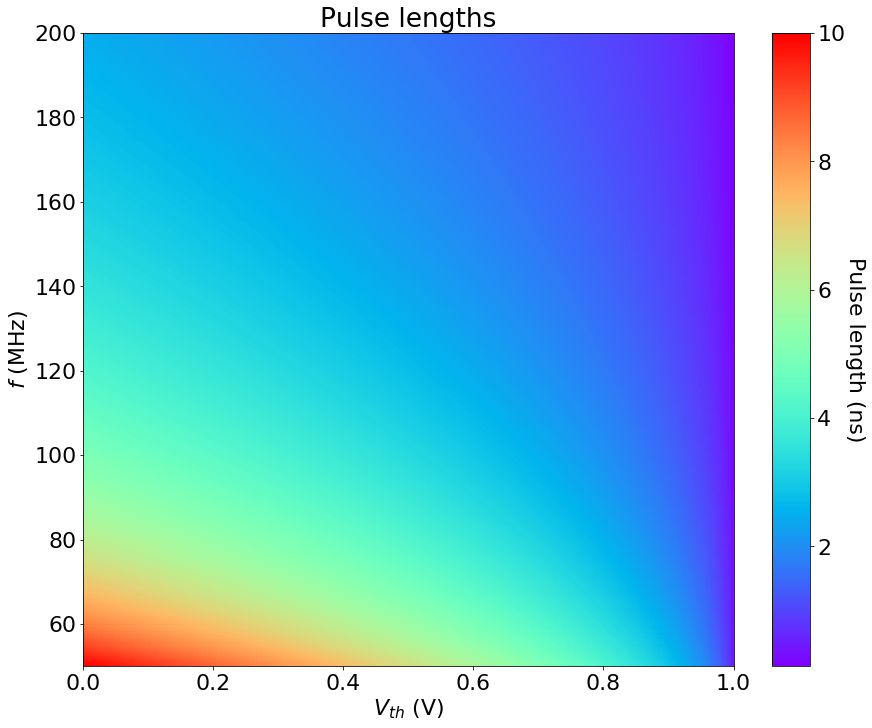

In [40]:
%matplotlib inline
matplotlib.rcParams.update({'font.size':22})
fig, ax = plt.subplots(ncols=1,nrows=1,constrained_layout=True,figsize=(12,10))
ax.set_title("Pulse lengths")
mesh = ax.pcolormesh(Vths,wrfs,tp*1e9,cmap='rainbow')
ax.set_xlabel('$V_{th}$ (V)')
ax.set_ylabel('$f$ (MHz)')

cbar = fig.colorbar(mesh)
cbar.set_label('Pulse length (ns)',rotation=-90,labelpad=20)
plt.savefig('Pulse_vs_f_vs_Vth.pdf')
plt.show()

# Risetime vs. bandwidth:

Risetime: is defined as the time that it takes to the signal to go from 10% to 90% of its maximum value<br>
Bandwidth: frequency region where the spectrum of the signal is within 3dB of its maximum<br>
The two are related by the relation:<br>
$BW=\frac{\ln(9)}{2\pi}t_R$

In [2]:
const=np.log(9)/2/np.pi
tr=2e-11 #20 ps risetime
BW=const/tr

In [3]:
BW/1e9 #17GHz resulting bandwidth

17.484957628302993

Model the response as an RC lowpass filter:

In [4]:
#Capacitor impedance
def Zc(C,f):
    return -1j/(2*np.pi*f*C)
#Output voltage of the RC voltage divider:
#Vout(w)=Zc(w)/(Zc(w)+R)*Vin
def Vout(Vin,R,C,f):
    return Zc(C,f)/(Zc(C,f)+R)*Vin

In [5]:
fc=BW
R=1 #1ohm resistor (arbitrary)
C=1/(2*np.pi*fc*R) #set capacitance to give the desired cutoff frequency f=1/(2*pi*RC)
Vout(1,R,C,1e3)

(0.9999999999999968-5.719201734760234e-08j)

In [6]:
C

9.102392266268372e-12

Lowpass filter (amplitude) transmission function

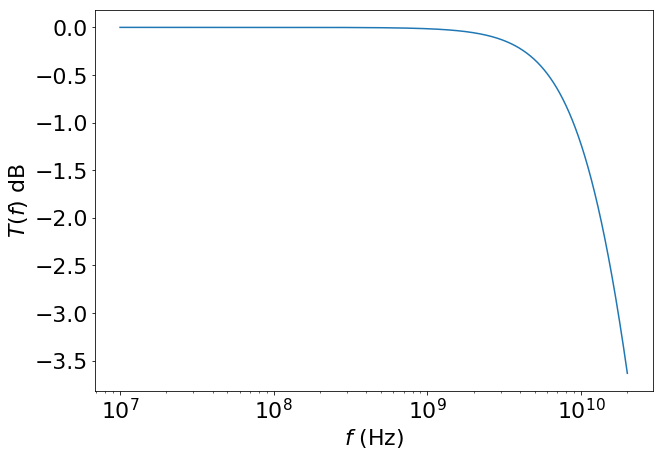

In [12]:
f=np.linspace(1e7,2e10,1000)
fig,ax=plt.subplots(figsize=(10,7))
P=np.abs(Vout(1,R,C,f))**2 #Power
dbP=10*np.log10(P) #dB Power
ax.plot(f,dbP)
plt.xlabel('$f$ (Hz)')
plt.ylabel('$T(f)$ dB')
plt.xscale('log')

Import Fast Fourier Transform tools

In [19]:
from scipy.fftpack import fft, ifft, rfft, irfft, fftfreq, fftshift

As a preliminary example consider sine, rectangular and sinc signals, in a time interval of 2000ns between -1000ns and +1000ns. We know that the FF of a sine wave is a delta and that the sinc and the rectangular waves are one the FF of the other.

In [16]:
t=np.linspace(-1000,1000,2000) #1ns resolution
dt=np.max(t)-np.min(t) #length of the interval
x=np.sin(2*np.pi*0.05*t) #50MHz sine wave
y=10*np.sinc(np.pi*t/100) #sinc signal
z=np.heaviside(t+250,0)*np.heaviside(-t+250,0) #rectangular wave of width 500ns

(-500, 500)

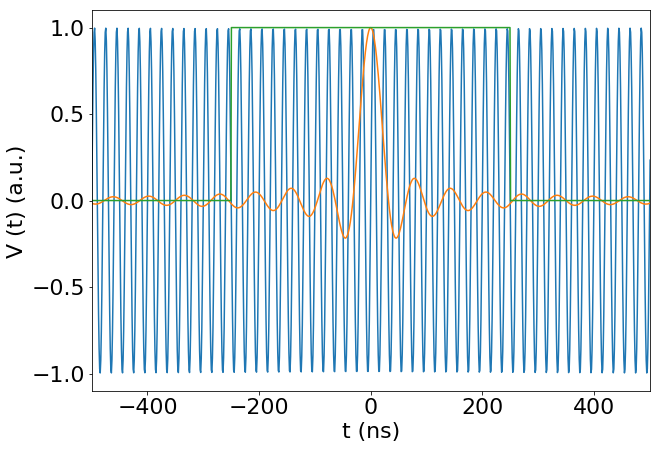

In [23]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(t,x)
ax.plot(t,y/10)
ax.plot(t,z)
plt.xlabel('t (ns)')
plt.ylabel('V (t) (a.u.)')
plt.xlim((-500,500))

The signal contains frequency components between -0.5GHz and +0.5GHz (symmetric interval of width 1Ghz=1/(time resolution)=1/1ns). The resolution (or minimum frequency component) is given by the inverse of the maximum time (=measurement time)

In [20]:
fs=np.linspace(-t.size/dt/2,t.size/dt/2,t.size) #frequency interval
xf=fft(x,t.size)
yf=fft(y,t.size)
zf=fft(z,t.size)
yzf=fft(y*z,t.size)

Sanity check (Plancherel's theorem): Given $\{X_n\}$ the discrete FF of the sequence $\{x_n\}$,<br>
$\sum_{n=0}^{N-1}\vert x_n\vert^2=\frac{1}{N}\sum_{n=0}^{N-1}\vert X_n\vert^2$

In [21]:
np.sum(x**2)-np.sum(np.abs(xf)**2)/t.size

0.0

Notice that the spectra below have been normalised to their maximum for display purpose.

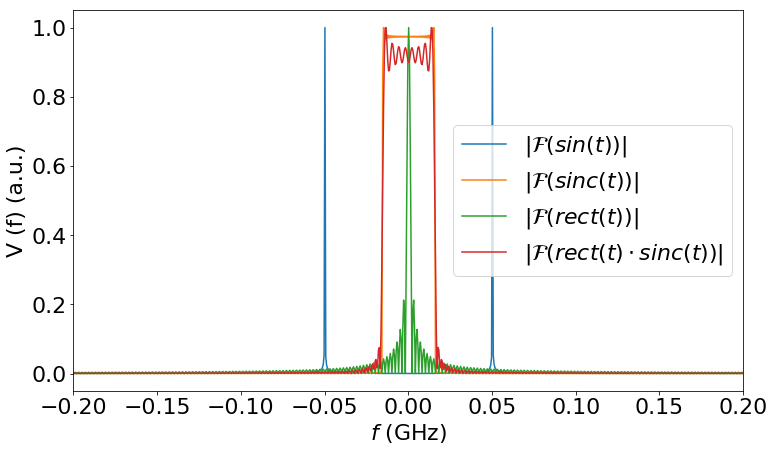

In [22]:
fig,ax=plt.subplots(figsize=(12,7))
ax.plot(fs,fftshift(np.abs(xf)/np.max(np.abs(xf))),label='$|\mathcal{F}(sin (t))|$')
ax.plot(fs,fftshift(np.abs(yf)/np.max(np.abs(yf))),label='$|\mathcal{F}(sinc (t))|$')
ax.plot(fs,fftshift(np.abs(zf)/np.max(np.abs(zf))),label='$|\mathcal{F}(rect (t))|$')
ax.plot(fs,fftshift(np.abs(yzf)/np.max(np.abs(yzf))),label='$|\mathcal{F}(rect (t)\cdot sinc (t))|$')
plt.xlim((-0.2,0.2))
plt.xlabel('$f$ (GHz)')
plt.ylabel('V (f) (a.u.)')
plt.legend()

Notice that the sine wave has frequency components only at $\pm50\,MHz$, as expected.

Now let us consided a perfect rectangular wave, 2ns long, going through the 17GHz lowpass filter defined above. In the frequency domain, the output voltage is equal to the input voltage times the transfer function of the voltage divider. Apllying the inverse FF to the result, we obtain the output voltage in the time domain. This procedure is equivalent do doing the convolution between the input voltage and the transfer function in the time domain.

Pulse in the time domain

In [25]:
t=np.linspace(-10,10,1e5) #time interal (ns)
dt=np.max(t)-np.min(t) #interval duration
pulse=np.heaviside(t+1,0)*np.heaviside(-t+1,0) #rectangular pulse, 2ns long, centred at 0

Text(0,0.5,'V(t) (V)')

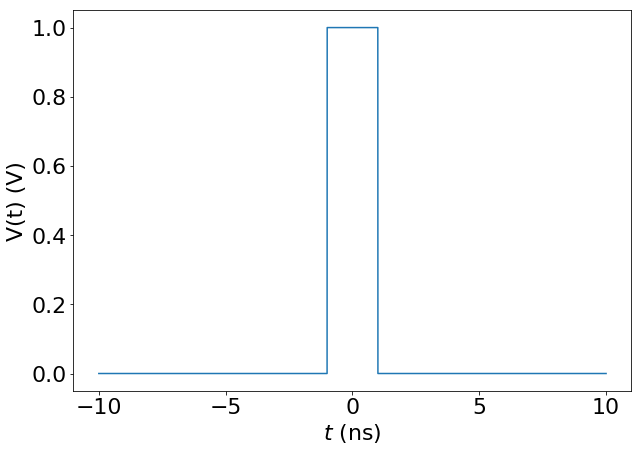

In [46]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(t,pulse)
plt.xlabel('$t$ (ns)')
plt.ylabel('V(t) (V)')

Transfer function:

In [27]:
fs=np.linspace(-t.size/dt/2,t.size/dt/2,t.size) #frequency interval (GHz)
resp=Vout(1,R,C,fs*1e9) #Amplitude transmission factor of the RC filter (=Vout(Vin=1))
#resp=np.heaviside(fs+1000,0)*np.heaviside(-fs+1000,0)

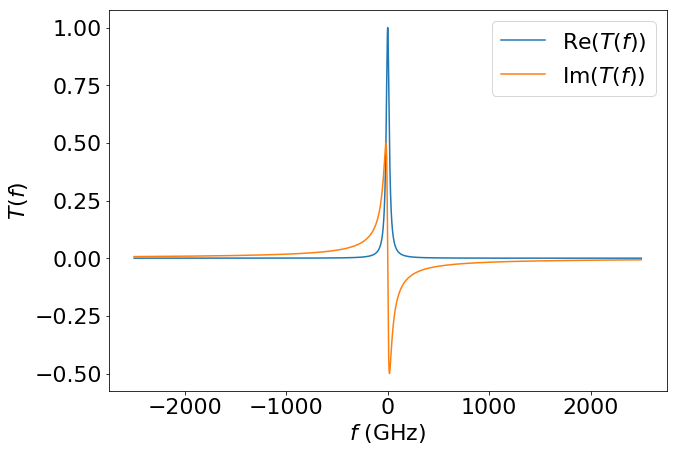

In [28]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(fs,np.real(resp),label='Re($T(f)$)')
ax.plot(fs,np.imag(resp),label='Im($T(f)$)')
plt.xlabel('$f$ (GHz)')
plt.ylabel('$T(f)$')
plt.legend()

Pulse in the frequency domain (=sinc function). Note that the result needs to be shifted using fftshift to get the frequency components in the right order (starting from negative to positive)

In [29]:
pulsef=np.real(fft(pulse,t.size))

Notice that we are plotting the specturm correctly recaled by the number of time points. Also notice that $V_{out}(\omega)= T(\omega)V_{in}(\omega)$, where $T(\omega)$ is the complex transmission factor of the lowpass

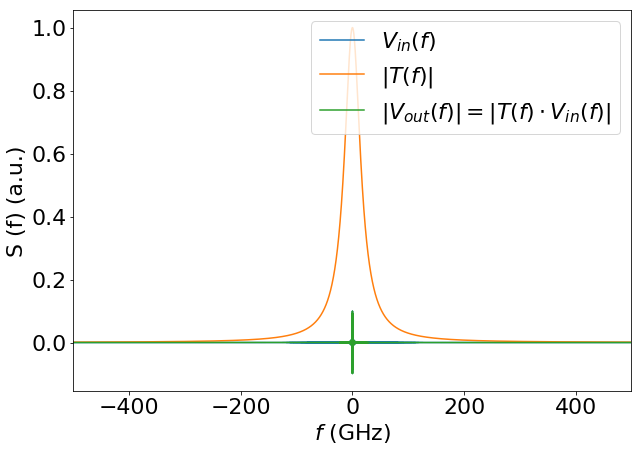

In [31]:
fig,ax=plt.subplots(figsize=(10,7))
ax.plot(fs,fftshift(pulsef)/t.size,label='$V_{in}(f)$')
ax.plot(fs,np.real(resp),label='$|T(f)|$')
ax.plot(fs,np.real(fftshift(pulsef)*resp)/t.size,label='$|V_{out}(f)|=|T(f)\cdot V_{in}(f)|$')
plt.xlabel('$f$ (GHz)')
plt.ylabel('S (f) (a.u.)')
plt.xlim((-500,500))
plt.legend()

Notice the response function needs to be shifted using fftshift before the multiplication. In this way we obtain the appropriate input to the inverse FF function iff.

In [32]:
pulseoutf=pulsef*fftshift(resp)
pulseout=ifft(pulseoutf,t.size)

[(0.95, 1.05)]

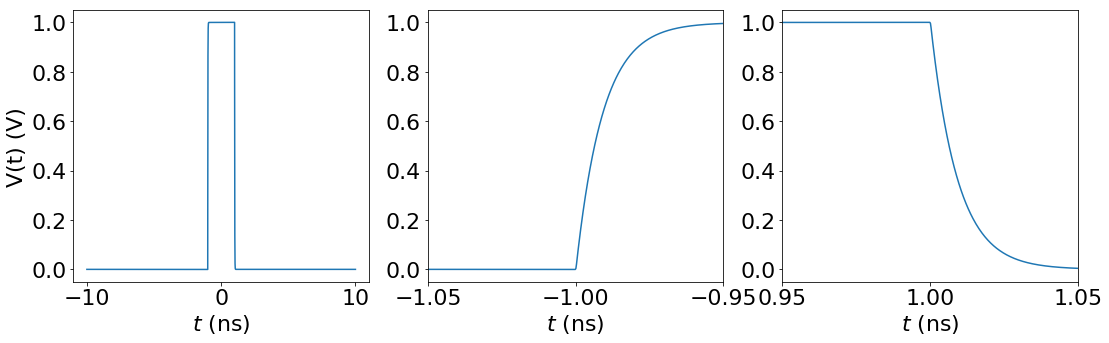

In [45]:
fig,ax=plt.subplots(1,3,figsize=(18,5))
ax[0].plot(t,np.real(pulseout))
ax[0].set(xlabel='$t$ (ns)', ylabel='V(t) (V)')
ax[1].plot(t,np.real(pulseout))
ax[1].set(xlabel='$t$ (ns)')
ax[1].set(xlim=(-1.05,-0.95))
ax[2].plot(t,np.real(pulseout))
ax[2].set(xlabel='$t$ (ns)')
ax[2].set(xlim=(0.95,1.05))

As expected, the output voltage in the time domain is a pulse with a finite rise and fall time.

In [34]:
np.sum(pulse**2)-np.sum(np.abs(pulseout)**2)

45.536225341509635

# Current at the notch (short circuit):

We now consider the effect of the short circuit at the end of the qubit bias lines. This can be described as an inductance of magnitude (cf. Rainee N. Simons, Coplanar Waveguide Circuits, Components, and Systems, p. 242) <br>
$L_{sc}=\left(\frac{2}{\pi}\right)\varepsilon_0\varepsilon_{eff}(w+s)Z_0^2\left[1-\frac{1}{\cosh\left(60\pi^2/Z_0\sqrt{\varepsilon_{eff}}\right)}\right]$<br>
where $w$ and $s$ are the gap and CPW widths, $\varepsilon_{eff}$ is the effective dielectric constant ($\varepsilon_{eff}=6.3$ for the LL designs) and $Z_0$ is the characteristic impedance of the line ($45.9$ for the LL designs).

We therefore have:

In [36]:
eps0=8.8541878128e-12
epseff=6.3
w=2e-6
s=3e-6
Z0=45.9
Lsc=2/np.pi*eps0*epseff*(w+s)*Z0**2*(1-(np.cosh(60*np.pi**2/(Z0*np.sqrt(epseff))))**(-1))

In [37]:
Lsc

3.696981615764216e-13

Let us describe the transmission lines as a lumped $50\Omega$ resistance, followed by $L_{sc}$:

In [38]:
Z=50.0+1j*2*np.pi*Lsc*fs

In [39]:
Ioutf=pulseoutf/Z
Iout=ifft(Ioutf,t.size)

[(0.95, 1.05)]

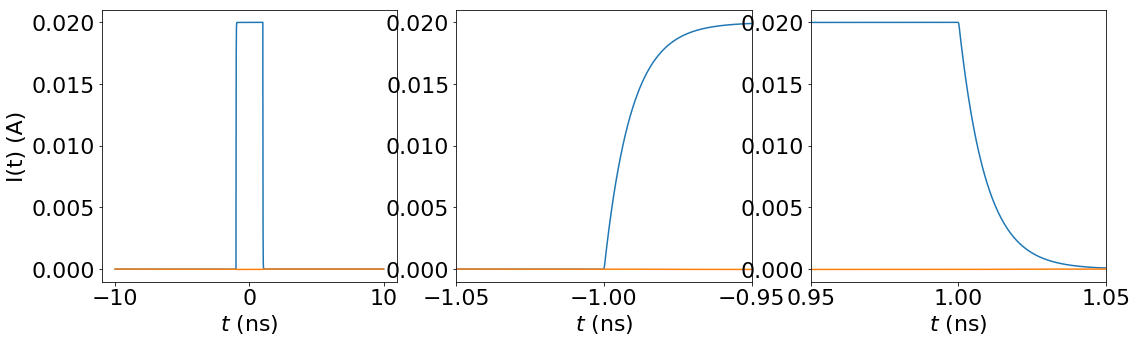

In [44]:
fig,ax=plt.subplots(1,3,figsize=(18,5))
ax[0].plot(t,np.real(Iout))
ax[0].plot(t,np.imag(Iout))
ax[0].set(xlabel='$t$ (ns)', ylabel='I(t) (A)')
ax[1].plot(t,np.real(Iout))
ax[1].plot(t,np.imag(Iout))
ax[1].set(xlabel='$t$ (ns)')
ax[1].set(xlim=(-1.05,-0.95))
ax[2].plot(t,np.real(Iout))
ax[2].plot(t,np.imag(Iout))
ax[2].set(xlabel='$t$ (ns)')
ax[2].set(xlim=(0.95,1.05))

The current signal does not appear distorted.